# COVID-19 日本における感染者数の推移予測
元データは[WHO発表](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports)より作成。

## 必要なライブラリの読み込み
使用するライブラリは
- pandas : 表データの扱い
- numpy : 数値計算
- matplotlib : グラフを描く

_import_ で読み込み。_as_ を付けることで、後のコード中でその名前でライブラリに含まれる関数を使うことができる。

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

まずは、csvデータからの読み込み。pandasのdataframe型になる。

In [24]:
df = pd.read_csv("COVID_2019.csv")
df

,date,Unnamed: 1,China,Japan,Korea,Singapore,Italy,Germany,France,USA,ref: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports
0,2020/01/21,Tue.,278.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2020/01/22,Wed.,309.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2020/01/23,Thu.,571.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
3,2020/01/24,Fri.,831.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,NaN
4,2020/01/25,Sat.,1297.0,3.0,2.0,3.0,0.0,0.0,3.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
84,2020/04/14,Wed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2020/04/15,Thu.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2020/04/16,Fri.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020/04/17,Sat.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


日本の感染者数の列を抽出して、numpyのndarray型にする。
ついでにdropna()でNaNを削除する。

In [25]:
j_confirmed = df.Japan.dropna().values
j_confirmed

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
       4.000e+00, 6.000e+00, 7.000e+00, 1.100e+01, 1.400e+01, 1.700e+01,
       2.000e+01, 2.000e+01, 2.000e+01, 2.300e+01, 2.500e+01, 2.500e+01,
       2.500e+01, 2.600e+01, 2.600e+01, 2.600e+01, 2.800e+01, 2.900e+01,
       3.300e+01, 4.100e+01, 5.300e+01, 5.900e+01, 6.500e+01, 7.300e+01,
       8.500e+01, 9.300e+01, 1.050e+02, 1.320e+02, 1.440e+02, 1.570e+02,
       1.640e+02, 1.860e+02, 2.100e+02, 2.300e+02, 2.390e+02, 2.540e+02,
       2.680e+02, 2.840e+02, 3.170e+02, 3.490e+02, 4.080e+02, 4.550e+02,
       4.880e+02, 5.140e+02, 5.680e+02, 6.200e+02, 6.750e+02, 7.160e+02,
       7.800e+02, 8.140e+02, 8.290e+02, 8.290e+02, 8.730e+02, 9.500e+02,
       9.960e+02, 1.046e+03, 1.089e+03, 1.128e+03, 1.193e+03, 1.291e+03,
       1.387e+03, 1.499e+03, 1.693e+03, 1.866e+03, 1.953e+03, 2.178e+03,
       2.384e+03, 2.617e+03, 2.920e+03, 3.271e+03, 3.654e+03, 3.906e+03])

x軸に並べる日付を準備。

In [26]:
xticks = df.date
x_latent = np.array(range(len(xticks)))

グラフを描画

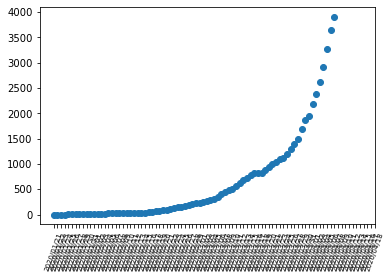

In [27]:
plt.scatter(x_latent[:len(j_confirmed)], j_confirmed, label="Observed")
plt.xticks(x_latent, xticks, fontsize=7, rotation=70);

渡された次数に応じて数式の文字列を作る関数を作成。

In [28]:
def gen_eq_str(coefficients:list, x:str="x", y:str="y"):
    s = "{} = ".format(y)
    if len(coefficients) == 0:
        s += "0"
    else:
        for i, coef in enumerate(coefficients):
            if i == len(coefficients) - 1:
                s += "{:.2f}".format(coef)
            elif i == len(coefficients) - 2:
                s += "{:.2f} {} + ".format(coef, x)
            else:
                s += "{:.2f} {}^{} + ".format(coef, x, len(coefficients)-i-1)
    return s

print(gen_eq_str([2]))
print(gen_eq_str([1, 2], y="z"))
print(gen_eq_str([5, 6, 7], x="t"))

y = 2.00
z = 1.00 x + 2.00
y = 5.00 t^2 + 6.00 t + 7.00


渡されたデータ列に対して、指定された範囲で近似曲線を描画する関数を作成。

In [29]:
def draw_approx_curve(x_data:np.ndarray, y_data:np.ndarray, r:range, 
    deg:int, forecast:int=14, color:str="green", info:str=""):
    x = [x_data[i] for i in r] - x_data[r.start]
    y = [y_data[i] for i in r] - y_data[r.start]
    coef = np.polyfit(x, y, deg)
    coef[deg] += y_data[r.start]
    x_f = [x_data[i] for i in range(r.start, r.stop + r.step * forecast, r.step)]
    curve = np.poly1d(coef)(x_f - x_data[r.start])
    label = gen_eq_str(coef)
    label = label[:label.rfind("x")+1]
    plt.plot(x_f, curve, c=color, label="{} {}".format(label, info))

データ数が多くなってきたので、ちょっと削る

In [30]:
xj_latent = x_latent[55:]
xjticks = xticks[55:]
j_confirmed = j_confirmed[55:]

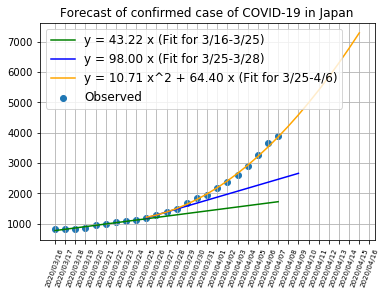

In [33]:
plt.scatter(xj_latent[:len(j_confirmed)], j_confirmed, label="Observed")
plt.xticks(xj_latent, xjticks, fontsize=7, rotation=70);
draw_approx_curve(xj_latent, j_confirmed, range(9), 1, info="(Fit for 3/16-3/25)")
draw_approx_curve(xj_latent, j_confirmed, range(9,11), 1, color="blue", info="(Fit for 3/25-3/28)")
draw_approx_curve(xj_latent, j_confirmed, range(9,21), 2, color="orange", forecast=10, info="(Fit for 3/25-4/6)")
#draw_approx_exp_curve(xj_latent, j_confirmed, range(9,21), color="cyan", forecast=0, info="(Fit for 3/11-3/31)")

plt.legend(fontsize=12)
plt.title("Forecast of confirmed case of COVID-19 in Japan")
plt.grid()

USの傾向のグラフ

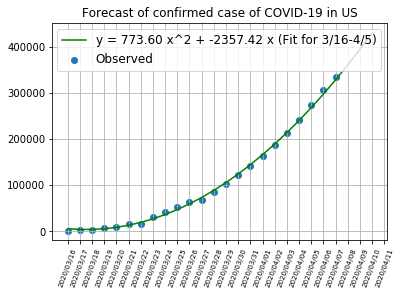

In [32]:
us_confirmed = df.USA.dropna().values
us_confirmed = us_confirmed[55:]
xu_latent = x_latent[55:]
xuticks = xticks[55:]
plt.scatter(xu_latent[:len(us_confirmed)], us_confirmed, label="Observed")
plt.xticks(xu_latent, xuticks, fontsize=7, rotation=70);
draw_approx_curve(xu_latent, us_confirmed, range(21), 2, forecast=5, info="(Fit for 3/16-4/5)")
plt.legend(fontsize=12)
plt.title("Forecast of confirmed case of COVID-19 in US")
plt.grid()

各国の新規感染者数の推移

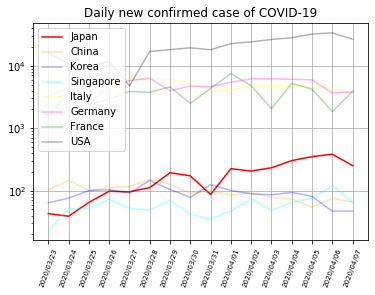

In [73]:
df_new = df[{"China", "Japan", "Korea", "Singapore", "Italy", "Germany", "France", "USA"}].diff()
df_new = pd.concat([df["date"], df_new], axis=1)
df_new = df_new[62:]
#print(df_new)
plt.plot(df_new["date"], df_new["Japan"], color="red", label="Japan")
plt.plot(df_new["date"], df_new["China"], color="orange", alpha=0.3, label="China")
plt.plot(df_new["date"], df_new["Korea"], color="blue", alpha=0.3, label="Korea")
plt.plot(df_new["date"], df_new["Singapore"], color="cyan", alpha=0.3, label="Singapore")
plt.plot(df_new["date"], df_new["Italy"], color="yellow", alpha=0.3, label="Italy")
plt.plot(df_new["date"], df_new["Germany"], color="magenta", alpha=0.3, label="Germany")
plt.plot(df_new["date"], df_new["France"], color="green", alpha=0.3, label="France")
plt.plot(df_new["date"], df_new["USA"], color="black", alpha=0.3, label="USA")

plt.xticks(range(len(df_new["date"])-11), df_new["date"], fontsize=7, rotation=70);
plt.yscale("log");
plt.grid();
plt.legend(loc="upper left");
plt.title("Daily new confirmed case of COVID-19");
